In [80]:
import pandas as pd
import numpy as np 
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression

In [56]:
df=pd.read_csv('../input/restaurant-reviews/Restaurant_Reviews.csv')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning Data

## Stop Words
Words such as ('the' , 'is' , 'are' , 'at' , 'a' , 'an' , 'on' ) doesn't convey any meaningful information regarding reviews.
So it's better to remove all these words from reviews.It will also reduce the size of our sparse Matrix.

In [57]:
from nltk.corpus import stopwords

# xyz is a list consisting of English Stopwords
xyz=stopwords.words('english') 
xyz.remove('not')

## Stemming
Same words might be present in different forms in reviews.
Consider this example:
1. I Loved the food.
2. I love the food.

Meaning of both the senteance is same.So it's better to stem the words rather than filling the sparse matrix with every form of the word. 

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

## Removing Punctuation 

We can remove punctuation with the help of re librarry

## Applying Stemming, Removing Stopwords and Punctuations from Reviews

In [59]:
corpus=[]

for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df.iloc[i,0]) # Removing punctuations
    review=review.lower() # Converting to lower case.
    review=review.split() # List of words in a review.
    ps=PorterStemmer() # Stemming Words
    review=[ps.stem(word) for word in review if not word in set(xyz)] #Stemming words those are not in list xyz i.e list of stopping words
    review=' '.join(review)
    corpus.append(review)
    

## Original Reviews vs Transformed Ones.
Let's See how the reviews look after cleaning process.

In [60]:
original=list(df.Review)
original[:10]

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.']

In [61]:
corpus[0:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

## Creating Bag of Words

How many words should be have in our bag ? Let's see total number of different words in corpus list.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
no_of_words=cv.fit_transform(corpus).toarray()
len(no_of_words[0])

1566

So we have 1566 different words in corpus list.But some of them might occur only once such as name of secific dish etc.
So we can take 1500 words for creating our bag of words.

In [65]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

## Splitting Training and Test Set

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Naive Bayes Classifier

In [71]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print('Test Score : {} %'.format(classifier.score(X_test,y_test)*100))

Test Score : 64.0 %


## Cross Val Score of Naive Bayes

In [76]:
cross_val_score(classifier,X_train,y_train,cv=10).mean()*100

68.62499999999999

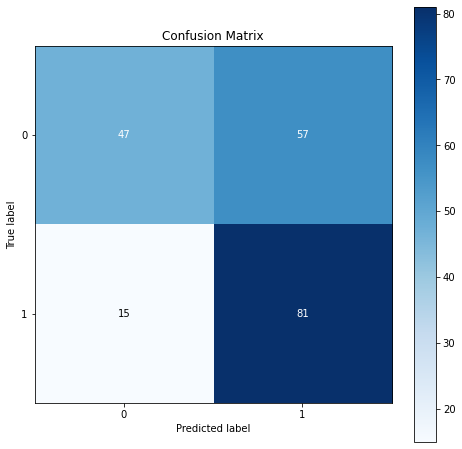

In [78]:
skplt.metrics.plot_confusion_matrix(y_test,classifier.predict(X_test),figsize=(8,8))

## Logistic Regression

In [86]:
logistic_classifier=LogisticRegression()
logistic_classifier.fit(X_train,y_train)
print('Test Score : {} %'.format(logistic_classifier.score(X_test,y_test)*100))

Test Score : 82.5 %


## Cross Val Score for Logistic Regression

In [96]:
cross_val_score(logistic_classifier,X_train,y_train,cv=10).mean()*100

80.87499999999999

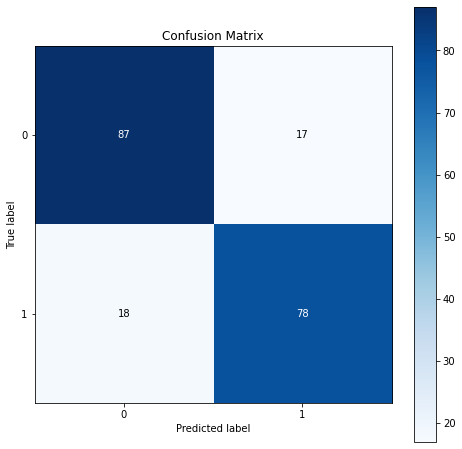

In [99]:
skplt.metrics.plot_confusion_matrix(y_test,logistic_classifier.predict(X_test),figsize=(8,8))